In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from random import * 
import random
from copy import copy
from math import sqrt

In [2]:
# Definindo a base de dados
colors = ['b', 'orange', 'g', 'm', 'c', 'y', 'k', 'Brown', 'ForestGreen']

def generateData(numGroups, numPoints):
    # Define three cluster centers
    positionData = []
    for i in range(numGroups):
        positionData.append([random.randint(1, 9), random.randint(1, 9)])

    # Define three cluster sigmas in x and y, respectively
    sigmas = []
    for i in range(numGroups):
        sigmas.append([uniform(0.2, 1.0), uniform(0.2, 1.0)])

    # Generate test data
    xpts = []
    ypts = []
    labels = np.zeros(1)

    for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(positionData, sigmas)):
        xpts = np.hstack((xpts, np.random.standard_normal(numPoints) * xsigma + xmu))
        ypts = np.hstack((ypts, np.random.standard_normal(numPoints) * ysigma + ymu))
        labels = np.hstack((labels, np.ones(200) * i))
    return xpts, ypts, positionData

In [3]:
def euclidean_distance(*args):
        sum = 0
        for cord in range(len(args[0])):
            for point in range(len(args) - 1):
                d = args[point][cord] - args[point + 1][cord]
                sum += d**2
        return sqrt(sum)

def zerarList(tam):
    return [0 for x in range(tam)]

In [4]:
def calcMatrizPertinencia(xpts, ypts, centers):
    dist = [0 for x in range(len(centers))]
    matriz_pertinencia = np.zeros(len(xpts))
    
    for i in range(len(xpts)):
        for j in range(numCenters):
            dist[j]= euclidean_distance(centers[j] , [xpts[i], ypts[i]])
        for j in range(numCenters):
            if(dist[j] == min(dist)):
                matriz_pertinencia[i]= j
    return matriz_pertinencia

In [5]:
def initialCenters(numCenters):
    centers = []
    for i in range(numCenters):
        centers.append([random.randint(1, 9), random.randint(1, 9)])
    return centers



def mean(xpts, ypts, numCenters, centers, matriz_pertinencia ):
    # Para todos os pontos, fazer a média dos pontos para o centro que pertence
    #iniciaizando vetores
    xmeans = zerarList(len(centers))
    ymeans = zerarList(len(centers))
    elements = zerarList(len(centers))
    
    #Média
    #Soma
    for i in range(len(xpts)):
        for j in range(numCenters+1):
            if (matriz_pertinencia[i] == j ):
                xmeans[j] = xmeans[j] + xpts[i]
                ymeans[j] = ymeans[j] +  ypts[i]
                elements[j] += 1
    #print("Elements -> ", elements)
    # Divisão pelo numero de termos
    for j in range(numCenters):
        if(elements[j]!= 0):
            xmeans[j] = round( xmeans[j] /elements[j], 5)
            ymeans[j] = round(ymeans[j] /elements[j], 5)
            
    return xmeans, ymeans

In [6]:
numGroups = 2
numPoints = 1000
numCenters = 2

xpts, ypts, positionData = generateData(numGroups, numPoints)

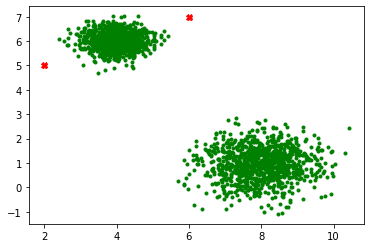

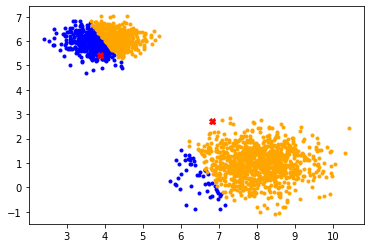

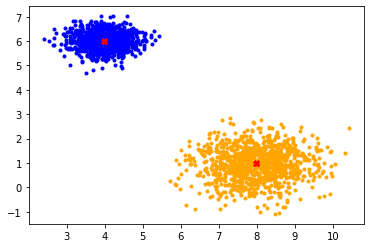

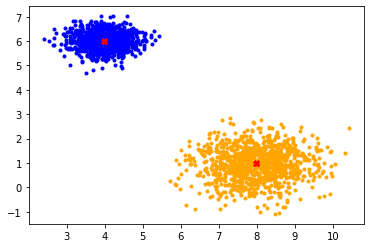

In [7]:
#Definindo centros aleatórios
centers = initialCenters(numCenters)

# Initial Plot
fig0, ax0 = plt.subplots()
ax0.plot(xpts, ypts, '.',color=colors[2])
for center in  range(len(centers)):
    ax0.plot(centers[center][0], centers[center][1], "X", color = "r")
        
#matriz de pertinencia

epoch = 0
ref = 1.0
last_centers= []
elements = []
matriz_pertinencia = np.zeros(len(xpts))

while epoch < 10 and last_centers != centers:
    
    matriz_pertinencia = calcMatrizPertinencia(xpts, ypts, centers)

    xmeans, ymeans = mean(xpts, ypts, numCenters, centers, matriz_pertinencia )
    
     # Redefine os centros
    last_centers = copy(centers)
    for i in range(len(centers)):  
        if (xmeans[i] != 0 and ymeans[i]!=0):
            centers[i] = [xmeans[i], ymeans[i]]
        #print(centers)
        
    # Pot o gáfico
    fig0, ax0 = plt.subplots()
    for center in range(len(centers)):
        ax0.plot(xpts[matriz_pertinencia == center], ypts[matriz_pertinencia == center], '.',color=colors[center])
        ax0.plot(centers[center][0], centers[center][1], "X", color = "r")     
    epoch+= 1
    #print(matriz_pertinencia)
    #print(" Centers=",centers)

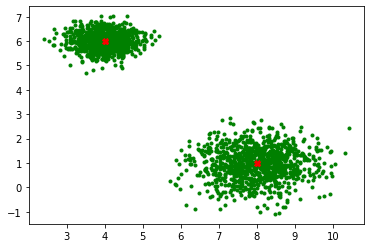

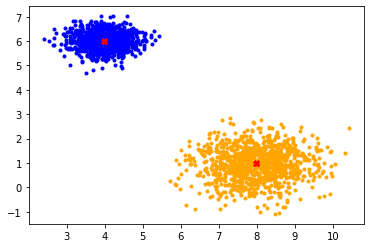

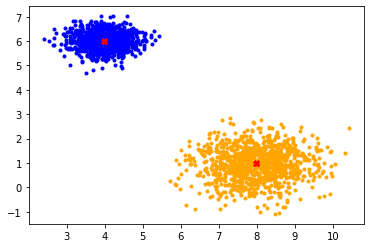

In [8]:
 
        
#Definindo centros a partir das medias
centers = positionData

# Initial Plot
fig0, ax0 = plt.subplots()
ax0.plot(xpts, ypts, '.',color=colors[2])
for center in  range(len(centers)):
    ax0.plot(centers[center][0], centers[center][1], "X", color = "r")
        
#matriz de pertinencia

epoch = 0
ref = 1.0
last_centers= []
elements = []
matriz_pertinencia = np.zeros(len(xpts))

while epoch < 10 and last_centers != centers:
    
    matriz_pertinencia = calcMatrizPertinencia(xpts, ypts, centers)

    xmeans, ymeans = mean(xpts, ypts, numCenters, centers, matriz_pertinencia )
    
     # Redefine os centros
    last_centers = copy(centers)
    for i in range(len(centers)):  
        if (xmeans[i] != 0 and ymeans[i]!=0):
            centers[i] = [xmeans[i], ymeans[i]]
        #print(centers)
        
    # Pot o gáfico
    fig0, ax0 = plt.subplots()
    for center in range(len(centers)):
        ax0.plot(xpts[matriz_pertinencia == center], ypts[matriz_pertinencia == center], '.',color=colors[center])
        ax0.plot(centers[center][0], centers[center][1], "X", color = "r")     
    epoch+= 1
    #print(matriz_pertinencia)
    #print(" Centers=",centers)